In [127]:
# -*- coding: utf-8 -*-
import jieba
jieba.set_dictionary('dict.txt.big')##加入繁體中文

In [126]:
import re
from collections import Counter
import matplotlib.pyplot as plt

text = ""
words = []
dict = {}
weight = []

with open('hw1-dataset.txt',encoding="utf-8") as file:
    for i,line in enumerate(file.readlines()):
        line = re.sub("[A-Za-z0-9\：\?\(\.\·\—\，\。\“ \”]", "", line)

        if i == 500:
            break
        
        text += line;
        
        #建立分詞
        jieba.add_word('為什麼')
        jieba.add_word('有沒有')
        tags = jieba.lcut(line,cut_all=False)
        for tag in tags:
            if tag == "" or tag == '\t' or tag == '\n':
                continue;
            words.append(tag)
        
        c = Counter()
        index = 1
        for x in words:
            if len(x)>1 and x != '\r\n':
                c[x] += 1
                dict.setdefault(x, index)
                index = index + 1           

## 統計前一百個高頻詞彙

index 26 八卦:87 0.011546
index 23 有沒有:77 0.010219
index 118 什麼:50 0.006636
index 242 是不是:40 0.005309
index 21 台灣:38 0.005043
index 174 可以:34 0.004512
index 1 為什麼:31 0.004114
index 399 中國:25 0.003318
index 842 現在:25 0.003318
index 44 肥宅:22 0.002920


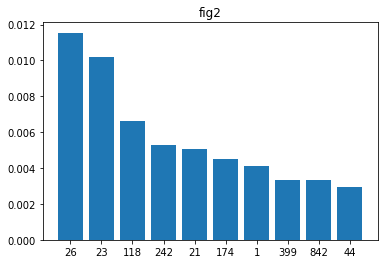

In [143]:
TotalWord = len(words)
x_label = []
y_label = []

with open('WordNumber_fig2.txt', 'a') as WordNum:
    WordNum.truncate(0)
    table = '字彙編號對應表_前一百個高頻詞彙\n\n'
    WordNum.write(table)
    table = "word        index\n\n"
    WordNum.write(table)
    for (k,v) in c.most_common(10):
        freq = v/TotalWord
        print("index %d %s:%d %f"%(dict[k],k, v, freq))
        
        ## 建立字彙編號對應表
        table = k.ljust(10)  + " " + str(dict[k]) + '\n'
        WordNum.write(table)

        x_label.append(str(dict[k]))
        y_label.append(freq)

plt.title('fig #2')
plt.bar(x_label,y_label)
plt.show()

## 統計前一百個TF-IDF權重⾼詞彙

word  118 : 什麼  weight:  0.2280584474175459
word  23 : 有沒有  weight:  0.21679630186606216
word  26 : 八卦  weight:  0.17842009177928167
word  21 : 台灣  weight:  0.10699038273909561
word  399 : 中國  weight:  0.07038840969677343
word  842 : 現在  weight:  0.07038840969677343
word  44 : 肥宅  weight:  0.06194180053316062
word  484 : 怎麼  weight:  0.056310727757418744
word  242 : 是不是  weight:  0.05514656750843147
word  131 : 比較  weight:  0.053495191369547807


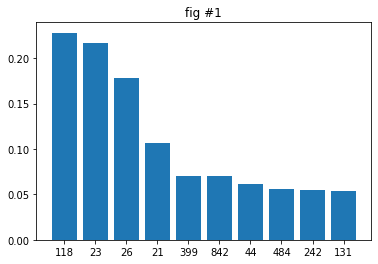

In [144]:
with open('WordNumber_fig1.txt', 'a') as WordNum:
    WordNum.truncate(0)
    table = '字彙編號對應表_前一百個TF-IDF權重⾼詞彙\n\n'
    WordNum.write(table)
    table = "word        index\n\n"
    WordNum.write(table)
    
    weight = jieba.analyse.extract_tags(text, topK = 10, withWeight=True)
    x_label = []
    y_label = []

    for w in weight:
        print("word ", dict[w[0]], ":", w[0]," weight: ", w[1])
        ## 建立字彙編號對應表
        table = w[0].ljust(10)  + " " + str(dict[w[0]]) + '\n'
        WordNum.write(table)

        x_label.append(str(dict[w[0]]))
        y_label.append(w[1])
    
plt.title('fig #1')
plt.bar(x_label,y_label)
plt.show()